![](images/obspy_logo_full_524x179px.png)

<div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">ObsPy:  Gestione dei metadati delle stazioni</div>

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

- Per i metadati delle stazioni, lo standard di-fatto del futuro è [FDSN StationXML](http://www.fdsn.org/xml/station/)
- i file FDSN StationXML possono essere letti usando **`read_inventory()`**

In [2]:
import obspy

inventory = obspy.read_inventory("./data/station_PFO.xml")
print(type(inventory))

<class 'obspy.core.inventory.inventory.Inventory'>


- la struttura annidata della classe ObsPy Inventory (Inventario / Stazione / Canale / Risposta / ...) è modellata molto attentamente sulla FDSN StationXML
<img src="images/Inventory.svg" width=90%>

In [4]:
!head data/station_BFO.xml

<?xml version="1.0" encoding="UTF-8"?>
<FDSNStationXML xmlns="http://www.fdsn.org/xml/station/1" schemaVersion="1.0">
  <Source>SeisComP3</Source>
  <Sender>ODC</Sender>
  <Created>2015-02-20T10:41:48</Created>
  <Network code="GR" startDate="1976-02-17T00:00:00" restrictedStatus="open">
    <Description>German Regional Seismic Network, BGR Hannover</Description>
    <Station code="BFO" startDate="1991-01-01T00:00:00" restrictedStatus="open">
      <Latitude>48.3311</Latitude>
      <Longitude>8.3303</Longitude>


In [5]:
print(inventory)

Inventory created at 2014-02-17T15:43:45.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.0.11
		    http://service.iris.edu/fdsnws/station/1/query?network=II&level=res...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (1):
			II.PFO (Pinon Flat, California, USA)
		Channels (2):
			II.PFO.00.BHZ, II.PFO.10.BHZ


In [6]:
network = inventory[0]
print(network)

Network II (Global Seismograph Network (GSN - IRIS/IDA))
	Station Count: 1/50 (Selected/Total)
	1986-01-01T00:00:00.000000Z - 2020-12-12T23:59:59.000000Z
	Access: open
	Contains:
		Stations (1):
			II.PFO (Pinon Flat, California, USA)
		Channels (2):
			II.PFO.00.BHZ, II.PFO.10.BHZ


In [7]:
station = network[0]
print(station)

Station PFO (Pinon Flat, California, USA)
	Station Code: PFO
	Channel Count: 2/250 (Selected/Total)
	2006-07-13T00:00:00.000000Z - 2020-12-31T23:59:59.000000Z
	Access: open 
	Latitude: 33.61, Longitude: -116.46, Elevation: 1280.0 m
	Available Channels:
		PFO.00.BHZ, PFO.10.BHZ


In [8]:
channel = station[0]
print(channel)

Channel 'BHZ', Location '00' 
	Time range: 2010-07-30T18:50:00.000000Z - 2012-07-02T03:59:59.000000Z
	Latitude: 33.61, Longitude: -116.46, Elevation: 1280.0 m, Local Depth: 5.3 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 20.00 Hz
	Sensor (Description): Streckeisen STS-1 Seismometer with Metrozet E300 (None)
	Response information available


In [9]:
print(channel.response)

Channel Response
	From M/S (Velocity in Meters Per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 5.24814e+09 defined at 0.050 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 3314.4
		Stage 2: PolesZerosResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to COUNTS, gain: 1.58333e+06
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1


In [10]:
st = obspy.read("./data/waveform_PFO.mseed")
print(st)

2 Trace(s) in Stream:
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.10.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.994500Z | 40.0 Hz, 120000 samples


In [11]:
inv = obspy.read_inventory("./data/station_PFO.xml", format="STATIONXML")

In [12]:
print(st[0].stats)

         network: II
         station: PFO
        location: 00
         channel: BHZ
       starttime: 2011-03-11T05:46:23.019500Z
         endtime: 2011-03-11T06:36:22.969500Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 60000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({u'record_length': 4096, u'encoding': u'STEIM1', 'filesize': 356352, u'dataquality': u'M', u'number_of_records': 32, u'byteorder': u'>'})


- la risposta dello strumento può essere deconvoluta dai dati della forma d'onda usando il metodo **`Stream.remove_response ()`**
- evalresp è usato internamente per calcolare la risposta dello strumento

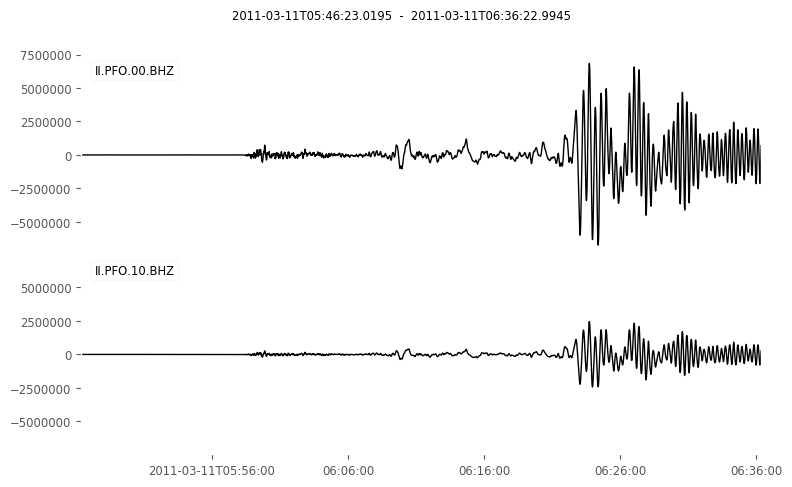

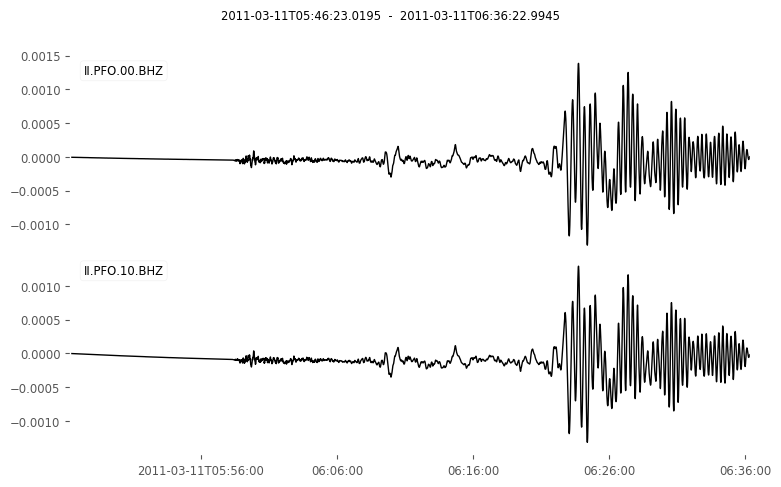

In [13]:
st.plot()
st.remove_response(inventory=inv)
st.plot()

- possono essere utilizzate diverse opzioni per specificare i dettagli della deconvoluzione (livello dell'acqua, prefiltraggio del dominio della frequenza), unità di uscita (velocità/spostamento/accelerazione), degradazione, riduzione progressiva e per specificare se eventuali stadi di risposta devono essere omessi

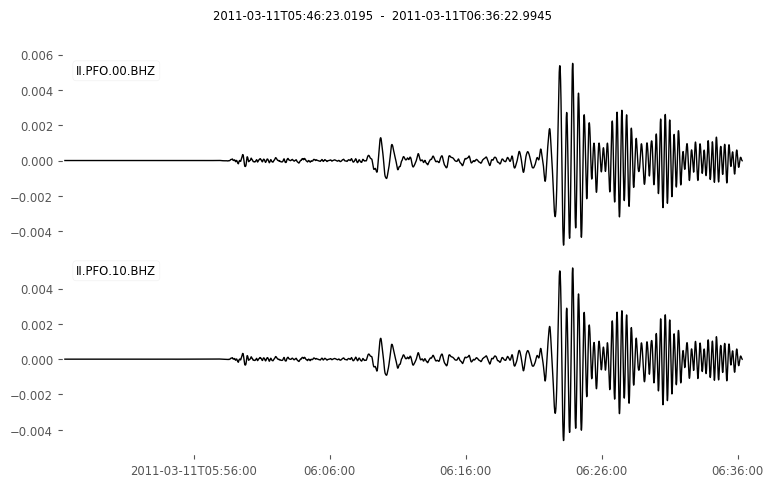

In [14]:
st = obspy.read("./data/waveform_PFO.mseed")
st.remove_response(inventory=inv, water_level=60, pre_filt=(0.01, 0.02, 8, 10), output="DISP")
st.plot()